In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import joblib
import multiprocessing as mp

import funktions as funk

import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import pos_tag

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Target Variables

In [4]:
for y in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    print("--------------------")
    print(y)
    print()
    print(funk.freq(train, [y]))
    print()

--------------------
toxic

    Count   Percent
0  144277  0.904156
1   15294  0.095844

--------------------
severe_toxic

    Count   Percent
0  157976  0.990004
1    1595  0.009996

--------------------
obscene

    Count   Percent
0  151122  0.947052
1    8449  0.052948

--------------------
threat

    Count   Percent
0  159093  0.997004
1     478  0.002996

--------------------
insult

    Count   Percent
0  151694  0.950636
1    7877  0.049364

--------------------
identity_hate

    Count   Percent
0  158166  0.991195
1    1405  0.008805



In [5]:
funk.freq(train, ['toxic','severe_toxic','obscene','threat','insult','identity_hate'])

,toxic,severe_toxic,obscene,threat,insult,identity_hate,Count,Percent
0,0,0,0,0,0,0,143346,0.999623
1,0,0,0,0,0,1,54,0.000377
2,0,0,0,0,1,0,301,0.914894
3,0,0,0,0,1,1,28,0.085106
4,0,0,0,1,0,0,22,1.000000
5,0,0,0,1,1,0,3,1.000000
6,0,0,1,0,0,0,317,0.990625
7,0,0,1,0,0,1,3,0.009375
8,0,0,1,0,1,0,181,0.909548
9,0,0,1,0,1,1,18,0.090452


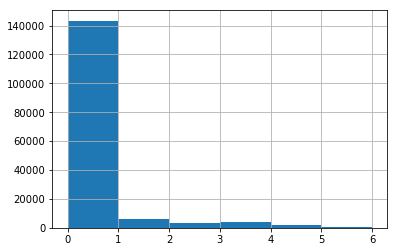

In [6]:
train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=1).hist(bins=6)

significant overlap of y labels; treat independently at first and then explore what information the relationships provide

## Text Characteristics

In [7]:
lens = train.comment_text.apply(lambda x: len(x))

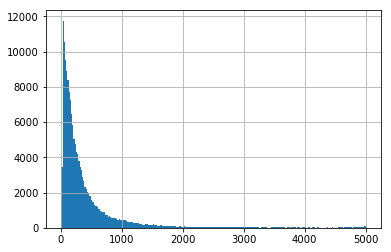

In [8]:
lens.hist(bins=250)

In [9]:
train.comment_text.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [10]:
t = train.comment_text[0]
print(t)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


## Text Tokenization

In [11]:
def tokenize(text):
    
    wml = WordNetLemmatizer()
    
    for token, tag in pos_tag(wordpunct_tokenize(text)):
        token = token.lower()
        token = token.strip()
        token = token.strip('_')
        token = token.strip('*')

        if token in sw.words('english'):
            continue

        if all(char in string.punctuation for char in token):
            continue
        
        tag = {
            'N': wn.NOUN,
            'V': wn.VERB,
            'R': wn.ADV,
            'J': wn.ADJ
        }.get(tag[0], wn.NOUN)
        
        lemma = wml.lemmatize(token, tag)
        
        yield lemma

In [12]:
list(tokenize(t))

['explanation',
 'edits',
 'make',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'revert',
 'vandalism',
 'closure',
 'gas',
 'vote',
 'new',
 'york',
 'doll',
 'fac',
 'please',
 'remove',
 'template',
 'talk',
 'page',
 'since',
 'retire',
 '89',
 '205',
 '38',
 '27']

In [13]:
cores = mp.cpu_count()-1 #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want
 
def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = mp.Pool(cores)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

def tokenize_df(df):
    df['clean_text_list'] = df['comment_text'].apply(lambda x: list(tokenize(x)))
    df['clean_text'] = df['clean_text_list'].apply(lambda x: " ".join(x))
    return df

In [14]:
train_clean = parallelize(train, tokenize_df)

In [15]:
test_clean = parallelize(test, tokenize_df)

In [16]:
joblib.dump(train_clean, 'data/train_clean.pckl')
joblib.dump(test_clean, 'data/test_clean.pckl')

['data/test_clean.pckl']

## Load Pickled Tokenized Data

In [2]:
train_clean = joblib.load('data/train_clean.pckl')
test_clean = joblib.load('data/test_clean.pckl')

In [3]:
train_clean.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text_list,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, edits, make, username, hardcore,...",explanation edits make username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[aww, match, background, colour, seemingly, st...",aww match background colour seemingly stick th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, really, try, edit, war, guy, consta...",hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[make, real, suggestion, improvement, wonder, ...",make real suggestion improvement wonder sectio...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[sir, hero, chance, remember, page]",sir hero chance remember page


## Bag of Words Vectorization

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
# bag of words, including bi-grams

vectorizer = CountVectorizer(ngram_range=(1,2),
                             tokenizer=None, 
                             preprocessor=None, 
                             lowercase=False)

X = vectorizer.fit_transform(train_clean['clean_text'])                        

In [8]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

## Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
mbayes = MultinomialNB()
mbayes.fit(X, train_clean['toxic'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
mbayes_pred = mbayes.predict_proba(X)

In [26]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(train_clean['toxic'], mbayes_pred[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

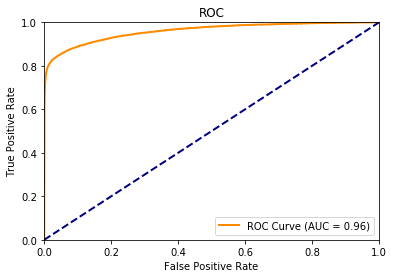

In [31]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [51]:
# cross validation AUC

cv_results = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    cv_results[target] = cross_val_score(mbayes, X, train_clean[target], cv=StratifiedKFold(5), scoring='roc_auc')
    print(target, 
          " "*(20-len(target)), 
          "  :  ", 
          round(np.mean(cv_results[target]), 4), 
          "  ", 
          round(np.std(cv_results[target]), 6))

toxic                   :   0.8601    0.003205
severe_toxic            :   0.8644    0.004199
obscene                 :   0.862    0.006637
threat                  :   0.7499    0.031864
insult                  :   0.8497    0.006109
identity_hate           :   0.779    0.014738


In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_vectorizer = TfidfTransformer(sublinear_tf=False)

X_tfidf = tfidf_vectorizer.fit_transform(X)   

In [55]:
# cross validation AUC

cv_results_tfidf = dict()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    cv_results_tfidf[target] = cross_val_score(mbayes, X_tfidf, train_clean[target], cv=StratifiedKFold(5), scoring='roc_auc')
    print(target, 
          " "*(20-len(target)), 
          "  :  ", 
          round(np.mean(cv_results_tfidf[target]), 4), 
          "  ", 
          round(np.std(cv_results_tfidf[target]), 6))

toxic                   :   0.8454    0.002871
severe_toxic            :   0.8547    0.007475
obscene                 :   0.8537    0.005573
threat                  :   0.7538    0.030615
insult                  :   0.8419    0.004978
identity_hate           :   0.785    0.010499


In [78]:
# CV estimated kaggle score (mean of auc across targets)
np.mean([np.mean(cv_results_tfidf[key]) for key in cv_results_tfidf])

0.82241290693755087

## Create Baseline NB Scores for Submission

In [58]:
X_test = X = vectorizer.transform(test_clean['clean_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [70]:
scores_baseline = test_clean[['id']].copy()

for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    mbayes.fit(X_tfidf, train_clean[target])
    scores_baseline[target] = mbayes.predict_proba(X_test_tfidf)[:,1]

In [74]:
scores_baseline.to_csv('data/S1_baselineNB.csv', index=False)

In [65]:
sample = pd.read_csv('data/sample_submission.csv')
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [72]:
len(sample), len(scores_baseline)

(153164, 153164)

## Regularized Logistic Regression

In [87]:
X.shape, X_tfidf.shape, X_test.shape, X_test_tfidf.shape, len(train_clean), len(test_clean)

((159571, 2605661),
 (159571, 2605661),
 (153164, 2605661),
 (153164, 2605661),
 159571,
 153164)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log = LogisticRegression(C=1.0, 
                         class_weight=None, 
                         dual=False, 
                         fit_intercept=True,
                         intercept_scaling=1, 
                         max_iter=100, 
                         multi_class='ovr', 
                         n_jobs=1, 
                         penalty='l2', 
                         random_state=None, 
                         solver='liblinear', 
                         tol=0.0001,
                         verbose=0, 
                         warm_start=False)
log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Logistic Regression fit vis SGD (Stochastic Gradient Descent)